In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
#from __future__ import print_function
from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
def heatThisLog(h5File):
    wf  = qp.retrieve_hdf5_data(h5File,'WF')
    fig = plt.figure(figsize=(8, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.ylabel('Gamma')
    plt.xlabel('Theta')
    #plt.imshow(qp.abs2(wf), vmax = 1e-30)
    plt.imshow(np.log(qp.abs2(wf)))
    
def heatThis(h5File):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    wf   = qp.retrieve_hdf5_data(h5File,'WF')
    time = qp.retrieve_hdf5_data(h5File,'Time')[0]
    fig = plt.figure(figsize=(16, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.title('Time = {:10.5f} fs'.format(time))
    plt.ylabel('Gamma')
    plt.xlabel('Theta')

    #plt.imshow(qp.abs2(wf), vmax = 1e-30)
    #plt.imshow(qp.abs2(wf), cmap='PuBu_r')
    
    # this is to get a nice colorbar on the side
    ax = plt.gca()
    im = ax.imshow(qp.abs2(wf), cmap='PuBu_r')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(im, cax=cax)
    
def f(x):
    return heatThis(os.path.join(a,filesList[x]))

In [3]:
subfolders = sorted([ dir for dir in os.listdir('.') if os.path.isdir(dir) and dir != '.ipynb_checkpoints'])
print(''.join(['{} -> {}\n'.format(a,b) for a,b in enumerate(subfolders)]))

0 -> input2_0000
1 -> input2_0001
2 -> input2_0002
3 -> input2_0003
4 -> input2_0004
5 -> input2_0005
6 -> input2_0007
7 -> inputProfiling_0000
8 -> inputProfiling_0001
9 -> inputProfiling_0002
10 -> input_dt_01_0000
11 -> input_dt_01_0001



In [4]:
a=subfolders[5]

In [5]:
filesList = [ fn for fn in sorted(os.listdir(a)) if fn[:8] == 'Gaussian']

In [6]:
lastV = len(filesList)-1
interact(f, x = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV));

interactive(children=(IntSlider(value=770, description='x', max=770), Output()), _dom_classes=('widget-interac…

# 1d slices

In [7]:
gamL,theL = (qp.retrieve_hdf5_data(os.path.join(a,filesList[0]),'WF')).shape

In [8]:
def sliceGammas(h5File, gamma):
    wf  = qp.retrieve_hdf5_data(h5File,'WF')
    fig = plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
    ys = wf[gamma,:]
    time = qp.retrieve_hdf5_data(h5File,'Time')[0]
    plt.title('Time = {:10.5f} fs --- gammaL = {}'.format(time,gamma))
    plt.ylim(-0.5,0.5)
    plt.plot(np.arange(ys.size), np.real(ys), linewidth=3.0)
    plt.plot(np.arange(ys.size), np.imag(ys), linewidth=3.0)

def sliceThetas(h5File, theta):
    wf  = qp.retrieve_hdf5_data(h5File,'WF')
    fig = plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
    ys = wf[:,theta]
    time = qp.retrieve_hdf5_data(h5File,'Time')[0]
    plt.title('Time = {:10.5f} fs --- thetaL = {}'.format(time,theta))
    plt.ylim(-0.5,0.5)
    plt.plot(np.arange(ys.size), np.real(ys), linewidth=3.0)
    plt.plot(np.arange(ys.size), np.imag(ys), linewidth=3.0)
    
    
def fgam(file_number,gamma):
    return sliceGammas(os.path.join(a, filesList[file_number]), gamma)

def fthe(file_number,theta):
    return sliceThetas(os.path.join(a, filesList[file_number]), theta)

In [9]:
interact(fgam, file_number = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV), gamma = widgets.IntSlider(min=0,max=gamL-1,step=1,value=8));

interactive(children=(IntSlider(value=770, description='file_number', max=770), IntSlider(value=8, description…

In [10]:
interact(fthe, file_number = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV), theta = widgets.IntSlider(min=0,max=theL-1,step=1,value=14));

interactive(children=(IntSlider(value=770, description='file_number', max=770), IntSlider(value=14, descriptio…

In [11]:
outfn = os.path.join(a,'output')

In [12]:
data = pd.read_csv(outfn, delim_whitespace=True, header=None);

In [13]:
data.head()

,0,1,2,3,4
0,0,0.000000,0.000000e+00,0.057258,0.000000e+00
1,10000,10.009927,-1.017088e-07,0.057258,-1.540711e-08
2,20000,20.019855,-7.932452e-08,0.057258,-1.515143e-08
3,30000,30.029782,1.413487e-08,0.057258,-4.268569e-09
4,40000,40.039709,6.584903e-08,0.057258,4.207945e-09


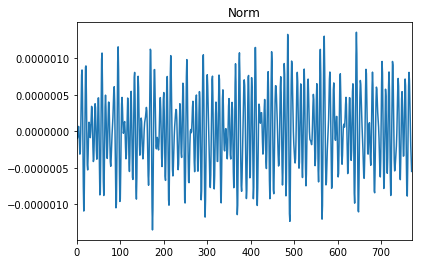

In [14]:
data[2].plot(title = 'Norm');

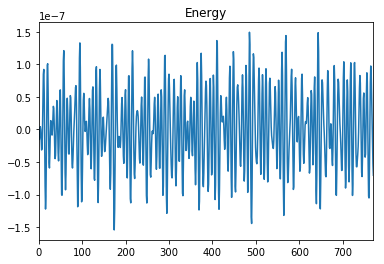

In [15]:
data[4].plot(title = 'Energy');